# Bond-Calculus Genetic Oscillator

In [30]:
import sys

sys.path.insert(0, "/home/twright/Documents/PhD/Notebooks")

In [31]:
from lbuc.bondcalculus import *
from lbuc.logic import *

## Load Enzyme Model

In [72]:
model = BondModel("./genos.bond"); model

Running cmd: 'load "genos.bond"' ...


In [73]:
p = model.process("MixF"); p

BondProcess('MixF', <lbuc.bondcalculus.BondModel object at 0x7f14c0b708e0>)

In [74]:
s = p.as_system; s

Running cmd: 'savesage "MixF" "/tmp/bond-sage-script-y55m1lcf.py"' ...


System(R, (x0, x1, x2, x3, x4, x5, x6, x7, x8), [0, 1, 0, 0, 0, 0, 0, 1, 0], (-0.1000000000000000?*x0*x1 - 2*x0*x5 - x0*x7 - x0 + 50*x2 + 100*x6 + 50*x8, -0.1000000000000000?*x0*x1 + 50*x8, 0.50000000000000000?*x1 - 10*x2 + 5*x8, 2*x0*x5 - x3, -0.50000000000000000?*x4 + 50*x6 + 0.01000000000000000?*x7, -2*x0*x5 + x3 + 0.50000000000000000?*x4 - 0.2000000000000000?*x5, x0*x7 - 100*x6, -x0*x7 + 100*x6, 0.1000000000000000?*x0*x1 - 50*x8), varmap=bidict({'P(bindA,unbindA,decayuA,decaybA;)': x0, 'Promoter(bindpA,unbindpA,transcA,transcbA,translA,decayA,bindA,unbindA,decayuA,decaybA;)': x1, 'MRNA(translA,decayA,bindA,unbindA,decayuA,decaybA;)': x2, 'new 0 in Pb(bindA,unbindA,decayuA,decaybA;0) | Pb(bindR,unbindR,decayuR,decaybR;0)': x3, 'MRNA(translR,decayR,bindR,unbindR,decayuR,decaybR;)': x4, 'P(bindR,unbindR,decayuR,decaybR;)': x5, 'new 0 in Pb(bindA,unbindA,decayuA,decaybA;0) | PromoterBound(bindpR,unbindpR,transcR,transcbR,translR,decayR,bindR,unbindR,decayuR,decaybR;0)': x6, 'Promoter(b

In [75]:
table(list(s.varmap.items()))

"P(bindA,unbindA,decayuA,decaybA;)",
"Promoter(bindpA,unbindpA,transcA,transcbA,translA,decayA,bindA,unbindA,decayuA,decaybA;)",
"MRNA(translA,decayA,bindA,unbindA,decayuA,decaybA;)",
"new 0 in Pb(bindA,unbindA,decayuA,decaybA;0) | Pb(bindR,unbindR,decayuR,decaybR;0)",
"MRNA(translR,decayR,bindR,unbindR,decayuR,decaybR;)",
"P(bindR,unbindR,decayuR,decaybR;)",
"new 0 in Pb(bindA,unbindA,decayuA,decaybA;0) | PromoterBound(bindpR,unbindpR,transcR,transcbR,translR,decayR,bindR,unbindR,decayuR,decaybR;0)",
"Promoter(bindpR,unbindpR,transcR,transcbR,translR,decayR,bindR,unbindR,decayuR,decaybR;)",
"new 0 in PromoterBound(bindpA,unbindpA,transcA,transcbA,translA,decayA,bindA,unbindA,decayuA,decaybA;0) | Pb(bindA,unbindA,decayuA,decaybA;0)",


In [76]:
table([x.endpoints() for x in s.y0])

,
,
,
,
,
,
,
,
,


In [77]:
from bidict import bidict

In [78]:
R.<x1,x2,x3,x4,x5,x6,x7,x8,x9> = RIF[]

In [79]:
vmap = bidict({
    x1: s.v('Promoter(bindpA,unbindpA,transcA,transcbA,translA,decayA,bindA,unbindA,decayuA,decaybA;)'),
    x2: s.v('Promoter(bindpR,unbindpR,transcR,transcbR,translR,decayR,bindR,unbindR,decayuR,decaybR;)'),
    x3: s.v('new 0 in PromoterBound(bindpA,unbindpA,transcA,transcbA,translA,decayA,bindA,unbindA,decayuA,decaybA;0) | Pb(bindA,unbindA,decayuA,decaybA;0)'),
    x4: s.v('new 0 in Pb(bindA,unbindA,decayuA,decaybA;0) | PromoterBound(bindpR,unbindpR,transcR,transcbR,translR,decayR,bindR,unbindR,decayuR,decaybR;0)'),
    x5: s.v('MRNA(translA,decayA,bindA,unbindA,decayuA,decaybA;)'),
    x6: s.v('P(bindA,unbindA,decayuA,decaybA;)'),
    x7: s.v('MRNA(translR,decayR,bindR,unbindR,decayuR,decaybR;)'),
    x8: s.v('P(bindR,unbindR,decayuR,decaybR;)'),
    x9: s.v('new 0 in Pb(bindA,unbindA,decayuA,decaybA;0) | Pb(bindR,unbindR,decayuR,decaybR;0)'),
}).inverse

In [80]:
vmap2 = bidict({
    x1: var('D_A'),
    x2: var('D_R'),
    x3: var('D_Ap'),
    x4: var('D_Rp'),
    x5: var('M_A'),
    x6: var('A'),
    x7: var('M_R'),
    x8: var('R'),
    x9: var('C'),
}).inverse

In [81]:
imap = {
    int(str(l)[1:]): int(str(r)[1:])
    for l, r in vmap.items()
}; imap

{1: 1, 7: 2, 8: 3, 6: 4, 2: 5, 0: 6, 4: 7, 5: 8, 3: 9}

In [82]:
def reorg(vmap, ys):
    ys = tuple(ys)
    imap = {
        int(str(l)[1:]) - 1: int(str(r)[1:])
        for l, r in vmap.inverse.items()
    }
    print(f"{imap=}\n{ys=}")
    return tuple(ys[imap[i]] for i in range(len(ys)))

In [83]:
y0 = [
    RIF('[0.98, 1.02]'),
    RIF('[1.28, 1.32]'),
    RIF('[0.08, 0.12]'),
    RIF('[0.08, 0.12]'), # x4
    RIF('[0.08, 0.12]'),
    RIF('[1.28, 1.32]'), # x6
    RIF('[2.48, 2.52]'),
    RIF('[0.58, 0.62]'),
    RIF('[1.28, 1.32]'),
]

In [ ]:
y0p = [y.midpoint() for y in y0]; y0p

In [84]:
s1 = System(
    R,
    (x1, x2, x3, x4, x5, x6, x7, x8, x9),
    y0,
    #reorg(vmap, s.y0),
    reorg(vmap, s.y.substitute(vmap)),
#    vmap2,
); s1

imap={0: 1, 1: 7, 2: 8, 3: 6, 4: 2, 5: 0, 6: 4, 7: 5, 8: 3}
ys=(-0.1000000000000000?*x0*x5 - x1*x5 - 2*x5*x7 + 50*x2 + 100*x3 + 50*x4 - x5, -0.1000000000000000?*x0*x5 + 50*x2, 0.50000000000000000?*x0 + 5*x2 - 10*x4, 2*x5*x7 - x8, 0.01000000000000000?*x1 + 50*x3 - 0.50000000000000000?*x6, -2*x5*x7 + 0.50000000000000000?*x6 - 0.2000000000000000?*x7 + x8, x1*x5 - 100*x3, -x1*x5 + 100*x3, 0.1000000000000000?*x0*x5 - 50*x2)


System(R, (x1, x2, x3, x4, x5, x6, x7, x8, x9), [[0.97999999999999998 .. 1.0200000000000001], [1.2799999999999998 .. 1.3200000000000001], [0.079999999999999987 .. 0.12000000000000001], [0.079999999999999987 .. 0.12000000000000001], [0.079999999999999987 .. 0.12000000000000001], [1.2799999999999998 .. 1.3200000000000001], [2.4799999999999999 .. 2.5200000000000001], [0.57999999999999996 .. 0.62000000000000011], [1.2799999999999998 .. 1.3200000000000001]], (-0.1000000000000000?*x1*x6 + 50*x3, -x2*x6 + 100*x4, 0.1000000000000000?*x1*x6 - 50*x3, x2*x6 - 100*x4, 0.50000000000000000?*x1 + 5*x3 - 10*x5, -0.1000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6, 0.01000000000000000?*x2 + 50*x4 - 0.50000000000000000?*x7, -2*x6*x8 + 0.50000000000000000?*x7 - 0.2000000000000000?*x8 + x9, 2*x6*x8 - x9), varmap=bidict({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'x5': x5, 'x6': x6, 'x7': x7, 'x8': x8, 'x9': x9}))

In [85]:
table([x.endpoints() for x in s1.y0])

,
,
,
,
,
,
,
,
,


In [86]:
table([[x, y] for (w, x), y in zip(s1.varmap.items(), s1.y)])

,
,
,
,
,
,
,
,
,


In [87]:
table([[w, y.substitute(vmap2.inverse)] for (w, x), y in zip(s1.varmap.items(), s1.y)])

x1,
x2,
x3,
x4,
x5,
x6,
x7,
x8,
x9,


## Basic Property

In [88]:
from lbuc import IntegrationMethod

In [89]:
opts = dict(
    order=4, step=0.003,
    precondition=1,
    estimation=1e-1,
    max_remainder_queue=250,
    integration_method=IntegrationMethod.ONLY_PICARD_SYMB,
    cutoff_threshold=1e-6,
)

In [90]:
P = Atomic(var("x6") > 1)
P

Atomic(x6 > 1)

In [91]:
def prop(k):
    return 125**2*(var("x4") - 0.003)**2 + 3*(var("x6") - 0.5)**2 < k

def prop1(k):
    return 125**2*(var("x4") - 0.007)**2 + 3*(var("x6") - 0.5)**2 < k

In [92]:
Q = Atomic(prop1(0.032)); Q

Atomic(15625*(x4 - 0.00700000000000000)^2 + 3*(x6 - 0.500000000000000)^2 < 0.0320000000000000)

In [93]:
our_property1 = P | G(RIF(3, 3.5), Q)

In [94]:
our_property2 = P | ({x2: RIF(0,0.0001)} >> G(RIF(3, 3.5), Q))

In [95]:
s1

System(R, (x1, x2, x3, x4, x5, x6, x7, x8, x9), [[0.97999999999999998 .. 1.0200000000000001], [1.2799999999999998 .. 1.3200000000000001], [0.079999999999999987 .. 0.12000000000000001], [0.079999999999999987 .. 0.12000000000000001], [0.079999999999999987 .. 0.12000000000000001], [1.2799999999999998 .. 1.3200000000000001], [2.4799999999999999 .. 2.5200000000000001], [0.57999999999999996 .. 0.62000000000000011], [1.2799999999999998 .. 1.3200000000000001]], (-0.1000000000000000?*x1*x6 + 50*x3, -x2*x6 + 100*x4, 0.1000000000000000?*x1*x6 - 50*x3, x2*x6 - 100*x4, 0.50000000000000000?*x1 + 5*x3 - 10*x5, -0.1000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6, 0.01000000000000000?*x2 + 50*x4 - 0.50000000000000000?*x7, -2*x6*x8 + 0.50000000000000000?*x7 - 0.2000000000000000?*x8 + x9, 2*x6*x8 - x9), varmap=bidict({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'x5': x5, 'x6': x6, 'x7': x7, 'x8': x8, 'x9': x9}))

In [96]:
opts

{'order': 4,
 'step': 0.00300000000000000,
 'precondition': 1,
 'estimation': 0.100000000000000,
 'max_remainder_queue': 250,
 'integration_method': <IntegrationMethod.ONLY_PICARD_SYMB: 7>,
 'cutoff_threshold': 1.00000000000000e-6}

In [97]:
rch = s1.reach(1, **opts)

In [98]:
rch.num_flowpipes

334

In [99]:
opts

{'order': 4,
 'step': 0.00300000000000000,
 'precondition': 1,
 'estimation': 0.100000000000000,
 'max_remainder_queue': 250,
 'integration_method': <IntegrationMethod.ONLY_PICARD_SYMB: 7>,
 'cutoff_threshold': 1.00000000000000e-6}

In [100]:
pl = our_property1.signal_for_system(s1, 1, **opts).plot()

phi variables sfs = {x6, x4}
system sfs = System(R, (x1, x2, x3, x4, x5, x6, x7, x8, x9), [[0.97999999999999998 .. 1.0200000000000001], [1.2799999999999998 .. 1.3200000000000001], [0.079999999999999987 .. 0.12000000000000001], [0.079999999999999987 .. 0.12000000000000001], [0.079999999999999987 .. 0.12000000000000001], [1.2799999999999998 .. 1.3200000000000001], [2.4799999999999999 .. 2.5200000000000001], [0.57999999999999996 .. 0.62000000000000011], [1.2799999999999998 .. 1.3200000000000001]], (-0.1000000000000000?*x1*x6 + 50*x3, -x2*x6 + 100*x4, 0.1000000000000000?*x1*x6 - 50*x3, x2*x6 - 100*x4, 0.50000000000000000?*x1 + 5*x3 - 10*x5, -0.1000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6, 0.01000000000000000?*x2 + 50*x4 - 0.50000000000000000?*x7, -2*x6*x8 + 0.50000000000000000?*x7 - 0.2000000000000000?*x8 + x9, 2*x6*x8 - x9), varmap=bidict({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'x5': x5, 'x6': x6, 'x7': x7, 'x8': x8, 'x9': x9}))
Computed 1501 flowpipes in 128.7

PolyObserver(-15625*x4^2 - 3*x6^2 + 218.7500000000001?*x4 + 3*x6 - 1.483625000000000?, <flowstar.reachability.Reach object at 0x7f2a78bef160>, -31250*x2*x4*x6 + 0.600000000000000?*x1*x6^2 + 6*x2*x6^2 + 12*x6^2*x8 + 3125000*x4^2 - 0.3000000000000000?*x1*x6 + 215.75000000000000?*x2*x6 - 300*x3*x6 - 600*x4*x6 - 300*x5*x6 + 6*x6^2 - 6*x6*x8 + 150*x3 - 21575*x4 + 150*x5 - 3*x6, symbolic_composition=True, symbolic_composition_order=4, tentative_unpreconditioning=True, mask=None)
fprime = -31250*x2*x4*x6 + 0.600000000000000?*x1*x6^2 + 6*x2*x6^2 + 12*x6^2*x8 + 3125000*x4^2 - 0.3000000000000000?*x1*x6 + 215.75000000000000?*x2*x6 - 300*x3*x6 - 600*x4*x6 - 300*x5*x6 + 6*x6^2 - 6*x6*x8 + 150*x3 - 21575*x4 + 150*x5 - 3*x6
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 188.28 seconds
roots = [[2.4355020129542945 .. 2.4360000000000555], [2.4377778312480082 .. 3.6780000000001026], [3.6796816431148995 .. 3.6810000000001027]]
domain = [0.0000000000000000 .. 6.0

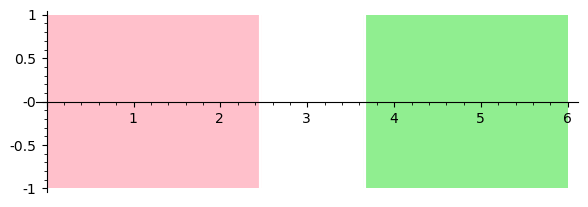

In [121]:
qsigs = Q.signal(reach, symbolic_composition=True)
qsigs.plot()

PolyObserver(-15625*x4^2 - 3*x6^2 + 218.7500000000001?*x4 + 3*x6 - 1.483625000000000?, <flowstar.reachability.Reach object at 0x7f2a78bef160>, -31250*x2*x4*x6 + 0.600000000000000?*x1*x6^2 + 6*x2*x6^2 + 12*x6^2*x8 + 3125000*x4^2 - 0.3000000000000000?*x1*x6 + 215.75000000000000?*x2*x6 - 300*x3*x6 - 600*x4*x6 - 300*x5*x6 + 6*x6^2 - 6*x6*x8 + 150*x3 - 21575*x4 + 150*x5 - 3*x6, symbolic_composition=False, symbolic_composition_order=4, tentative_unpreconditioning=True, mask=None)
fprime = -31250*x2*x4*x6 + 0.600000000000000?*x1*x6^2 + 6*x2*x6^2 + 12*x6^2*x8 + 3125000*x4^2 - 0.3000000000000000?*x1*x6 + 215.75000000000000?*x2*x6 - 300*x3*x6 - 600*x4*x6 - 300*x5*x6 + 6*x6^2 - 6*x6*x8 + 150*x3 - 21575*x4 + 150*x5 - 3*x6
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 8.26 seconds
roots = [[1.4639099741417751 .. 1.4640000000000184], [1.4655013774685909 .. 6.0000000000001910]]
domain = [0.0000000000000000 .. 6.0000000000000000]
roots = [[1.4639099741417751

/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


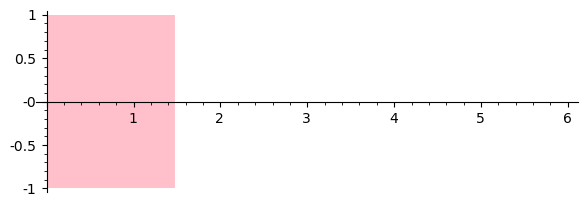

In [123]:
sigQnosym = Q.signal(reach, symbolic_composition=False)
sigQnosym.plot()

In [160]:
xpltrange = (1,6)
ypltrange = (-2, 2)
ypltrange2 = (-2, 0.1)

PolyObserver(-15625*x4^2 - 3*x6^2 + 218.7500000000001?*x4 + 3*x6 - 1.483625000000000?, <flowstar.reachability.Reach object at 0x7f2a78bef160>, -31250*x2*x4*x6 + 0.600000000000000?*x1*x6^2 + 6*x2*x6^2 + 12*x6^2*x8 + 3125000*x4^2 - 0.3000000000000000?*x1*x6 + 215.75000000000000?*x2*x6 - 300*x3*x6 - 600*x4*x6 - 300*x5*x6 + 6*x6^2 - 6*x6*x8 + 150*x3 - 21575*x4 + 150*x5 - 3*x6, symbolic_composition=True, symbolic_composition_order=4, tentative_unpreconditioning=True, mask=None)
fprime = -31250*x2*x4*x6 + 0.600000000000000?*x1*x6^2 + 6*x2*x6^2 + 12*x6^2*x8 + 3125000*x4^2 - 0.3000000000000000?*x1*x6 + 215.75000000000000?*x2*x6 - 300*x3*x6 - 600*x4*x6 - 300*x5*x6 + 6*x6^2 - 6*x6*x8 + 150*x3 - 21575*x4 + 150*x5 - 3*x6


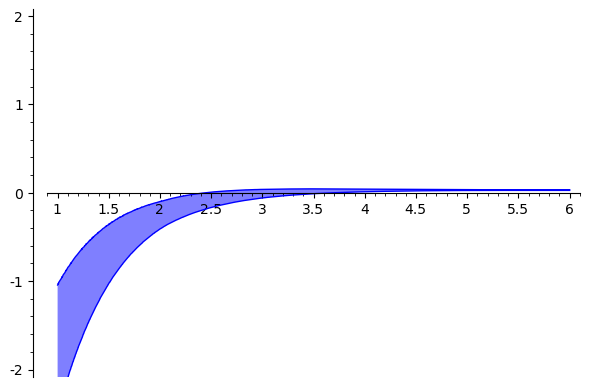

In [161]:
qplt = Q.sage_plot(reach,duration=xpltrange,
                   symbolic_composition=True,
                   ticks=[0.5, 1])
qplt.ymin(ypltrange[0])
qplt.ymax(ypltrange[1])
qplt

PolyObserver(-15625*x4^2 - 3*x6^2 + 218.7500000000001?*x4 + 3*x6 - 1.483625000000000?, <flowstar.reachability.Reach object at 0x7f2a78bef160>, -31250*x2*x4*x6 + 0.600000000000000?*x1*x6^2 + 6*x2*x6^2 + 12*x6^2*x8 + 3125000*x4^2 - 0.3000000000000000?*x1*x6 + 215.75000000000000?*x2*x6 - 300*x3*x6 - 600*x4*x6 - 300*x5*x6 + 6*x6^2 - 6*x6*x8 + 150*x3 - 21575*x4 + 150*x5 - 3*x6, symbolic_composition=False, symbolic_composition_order=4, tentative_unpreconditioning=True, mask=None)
fprime = -31250*x2*x4*x6 + 0.600000000000000?*x1*x6^2 + 6*x2*x6^2 + 12*x6^2*x8 + 3125000*x4^2 - 0.3000000000000000?*x1*x6 + 215.75000000000000?*x2*x6 - 300*x3*x6 - 600*x4*x6 - 300*x5*x6 + 6*x6^2 - 6*x6*x8 + 150*x3 - 21575*x4 + 150*x5 - 3*x6


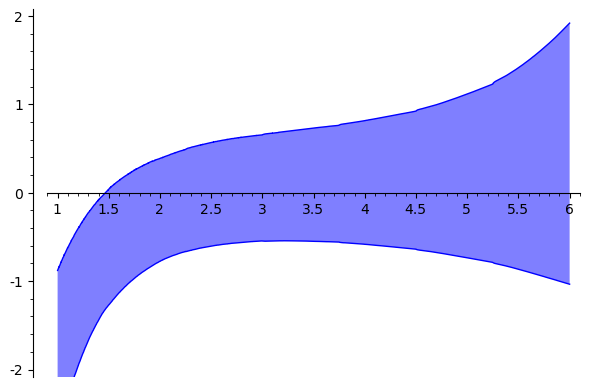

In [162]:
qpltnosym = Q.sage_plot(reach,duration=xpltrange,
                   symbolic_composition=False,
                   ticks=[0.5, 1])
qpltnosym.ymin(ypltrange[0])
qpltnosym.ymax(ypltrange[1])
qpltnosym

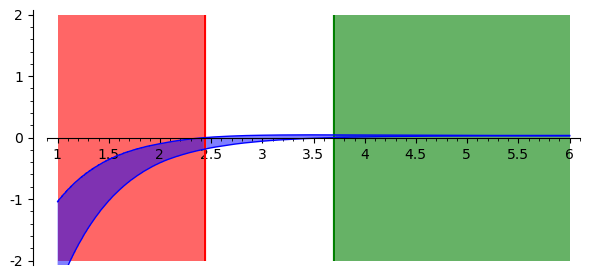

In [166]:
qplt2 = (
    qplt + region_plot(lambda t, _: qsigs(t),
                       xpltrange, ypltrange, incol='green',
                       bordercol='green',
                       alpha=0.6)
         + region_plot(lambda t, _: qsigs(t) is False,
                       xpltrange, ypltrange, incol='red',
                       bordercol='red',
                       alpha=0.6)
)
qplt2.ymin(ypltrange[0])
qplt2.ymax(ypltrange[1])
# qplt2.set_aspect_ratio(0.76)
qplt2.set_aspect_ratio(0.6)
qplt2.save("images/qplt2.pdf")
qplt2

/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,
/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


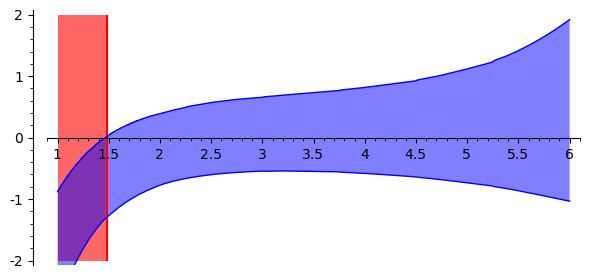

In [174]:
qpltnosym2 = (
    qpltnosym
    + region_plot(lambda t, _: sigQnosym(t),
                  xpltrange, ypltrange,
                  bordercol='green',
                  incol='green', alpha=0.6)
    + region_plot(lambda t, _: sigQnosym(t) is False,
                  xpltrange, ypltrange,
                  bordercol='red',
                  incol='red', alpha=0.6)
)
qpltnosym2.set_aspect_ratio(0.6)
qpltnosym2.ymin(-2)
qpltnosym2.save("images/Q-no-sym.pdf")
qpltnosym2

In [146]:
our_property.signal(reach, symbolic_composition=False)

PolyObserver(x6 - 1, <flowstar.reachability.Reach object at 0x7f2a78bef160>, -0.1000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6, symbolic_composition=False, symbolic_composition_order=4, tentative_unpreconditioning=True, mask=None)
fprime = -0.1000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 3.44 seconds
roots = [[0.88667270934066999 .. 1.3094835775584147]]
domain = [0.0000000000000000 .. 6.0000000000000000]
roots = [[0.88667270934066999 .. 1.3094835775584147]]
seg_domain = [0.0000000000000000 .. 6.0000000000000000]
roots = [[0.88667270934066999 .. 1.3094835775584147]]
signal given bool roots: 1 items in 0.00 seconds
In G.signal
PolyObserver(-15625*x4^2 - 3*x6^2 + 218.7500000000001?*x4 + 3*x6 - 1.483625000000000?, <flowstar.reachability.Reach object at 0x7f2a78bef160>, -31250*x2*x4*x6 + 0.600000000000000?*x1*x6^2 + 6*x2*x6^2 + 12*x6^2*x8 + 3125000*x4^

Signal([0.0000000000000000 .. 3.0000000000000000], [([0.0000000000000000 .. 0.88667270934067000], True)], mask=None)

In [145]:
our_property.signal(reach, symbolic_composition=True)

PolyObserver(x6 - 1, <flowstar.reachability.Reach object at 0x7f2a78bef160>, -0.1000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6, symbolic_composition=True, symbolic_composition_order=4, tentative_unpreconditioning=True, mask=None)
fprime = -0.1000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 5.58 seconds
roots = [[0.90838024387329807 .. 1.2778497471154502]]
domain = [0.0000000000000000 .. 6.0000000000000000]
roots = [[0.90838024387329807 .. 1.2778497471154502]]
seg_domain = [0.0000000000000000 .. 6.0000000000000000]
roots = [[0.90838024387329807 .. 1.2778497471154502]]
signal given bool roots: 1 items in 0.02 seconds
In G.signal
PolyObserver(-15625*x4^2 - 3*x6^2 + 218.7500000000001?*x4 + 3*x6 - 1.483625000000000?, <flowstar.reachability.Reach object at 0x7f2a78bef160>, -31250*x2*x4*x6 + 0.600000000000000?*x1*x6^2 + 6*x2*x6^2 + 12*x6^2*x8 + 3125000*x4^2

Signal([0.0000000000000000 .. 3.0000000000000000], [([0.0000000000000000 .. 2.5000000000000000], True)], mask=None)

In [147]:
G(RIF(0, 1), our_property).signal(reach, symbolic_composition=False)

In G.signal
PolyObserver(x6 - 1, <flowstar.reachability.Reach object at 0x7f2a78bef160>, -0.1000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6, symbolic_composition=False, symbolic_composition_order=4, tentative_unpreconditioning=True, mask=None)
fprime = -0.1000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 3.47 seconds
roots = [[0.88667270934066999 .. 1.3094835775584147]]
domain = [0.0000000000000000 .. 6.0000000000000000]
roots = [[0.88667270934066999 .. 1.3094835775584147]]
seg_domain = [0.0000000000000000 .. 6.0000000000000000]
roots = [[0.88667270934066999 .. 1.3094835775584147]]
signal given bool roots: 1 items in 0.00 seconds
In G.signal
PolyObserver(-15625*x4^2 - 3*x6^2 + 218.7500000000001?*x4 + 3*x6 - 1.483625000000000?, <flowstar.reachability.Reach object at 0x7f2a78bef160>, -31250*x2*x4*x6 + 0.600000000000000?*x1*x6^2 + 6*x2*x6^2 + 12*x6^2*x8 +

Signal([0.0000000000000000 .. 3.0000000000000000], [], mask=None)

In [148]:
G(RIF(0, 1), our_property).signal(reach, symbolic_composition=True)

In G.signal
PolyObserver(x6 - 1, <flowstar.reachability.Reach object at 0x7f2a78bef160>, -0.1000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6, symbolic_composition=True, symbolic_composition_order=4, tentative_unpreconditioning=True, mask=None)
fprime = -0.1000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 3.50 seconds
roots = [[0.90838024387329807 .. 1.2778497471154502]]
domain = [0.0000000000000000 .. 6.0000000000000000]
roots = [[0.90838024387329807 .. 1.2778497471154502]]
seg_domain = [0.0000000000000000 .. 6.0000000000000000]
roots = [[0.90838024387329807 .. 1.2778497471154502]]
signal given bool roots: 1 items in 0.01 seconds
In G.signal
PolyObserver(-15625*x4^2 - 3*x6^2 + 218.7500000000001?*x4 + 3*x6 - 1.483625000000000?, <flowstar.reachability.Reach object at 0x7f2a78bef160>, -31250*x2*x4*x6 + 0.600000000000000?*x1*x6^2 + 6*x2*x6^2 + 12*x6^2*x8 + 

Signal([0.0000000000000000 .. 3.0000000000000000], [([0.0000000000000000 .. 1.5000000000000000], True)], mask=None)